<a href="https://colab.research.google.com/github/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/blob/main/Realce_y_filtrado_de_se%C3%B1ales_multivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

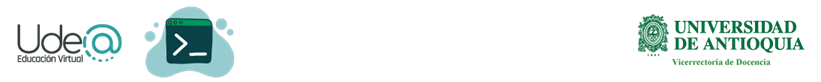

# Tratamiento de Señales III
## Laboratorio de realce y filtrado de señales multivariadas
**Profesor:** Hernán Felipe García Arias

**Estudiantes:**
- Camilo Hernández Ruiz
- Yan Sebastián Hoyos Cataño

Universidad de Antioquia

Facultad de Ingeniería

Sede Medellín

Ciudadela Universitaria

Semestre 2022-1

[Ir al repositorio](https://github.com/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/settings/access)

# Descripción del laboratorio

Debido a que el ruido es un factor importante que dificulta el análisis de una determinada señal, diversos tipos de ruido afectan de manera considerable su correcto procesamiento. En este sentido, es de vital importancia suprimir la información no deseada en una señal con el fin de realizar un mejoramiento en sus atributos (ej. nivel de detalle, contraste, etc.).

En esta actividad de aprendizaje debes elegir 4 imágenes de interés (pueden ser de aplicaciones en diferentes campos de las ciencias), luego de esto, se debe contaminar cada imagen con diferentes tipos de ruido y niveles como:

- Ruido Gaussiano
- Ruido de Poisson
- Ruido de sal y pimienta
- Ruido acústico (speckle)

Estos tipos de ruido están implementados en la librería SKIMAGE. 

Posteriormente, utilice las siguientes estrategias de filtrado para las cuales se requiere que varíe los parámetros propios de cada método y evalúe la relación señal a ruido (SNR). Las estrategias de filtrado a utilizar son:

- Gaussian Filter
- Median Filter
- Además, elige dos filtros de interés del paquete, investiga el funcionamiento y describe su desempeño 
  - [Scikit-image Module: filters](https://scikit-image.org/docs/stable/api/skimage.filters.html?highlight=filters#module-skimage.filters)

# Descripción de los tipos de ruido
## Ruido gaussiano
El ruido gaussiano es un ruido que tiene como función la densidad de probabilidad de una distribución normal. En otras palabras, los valores que el ruido puede asumir, colocando en abscisa la frecuencia y en orden la densidad de probabilidad, se distribuyen de acuerdo con un gaussiano.
$$
N(\mu, \sigma^2) =  \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$
El ruido gaussiano se define correctamente como un ruido con una distribución de amplitud gaussiana. El término gaussiano blanco se usa a menudo cuando el ruido tiene una densidad espectral constante.

## Ruido de Poisson
El ruido de disparo en los dispositivos electrónicos consiste en fluctuaciones aleatorias de la corriente eléctrica a través de un conductor, causadas por el hecho de que la corriente se transporta en cargas discretas (electrones). Es originado por el movimiento de los electrones o de otras partículas cargadas a través de una unión. Esto no sólo ocurre en las uniones p-n, sino en cualquier conductor, incluso en las situaciones en que la carga no esté bien localizada.

El ruido de disparo se puede modelar como un proceso de Poisson y los portadores de carga que forman la corriente siguen una distribución de Poisson. Las fluctuaciones de corriente tienen una desviación estándar dada por:

$${\displaystyle \sigma _{i}={\sqrt {2\,q\,I\,\Delta f}}} $$
donde ${\displaystyle q}$  es la carga elemental del electrón y ${\displaystyle I}$ es la corriente promedio a través del dispositivo. Se asume que todas las cantidades están referidas en unidades del Sistema Internacional.

## Ruido de sal y pimienta (salt-and-pepper noise)
Se presenta principalmente en imágenes y se caracteriza principalmente por cubrir de forma dispersa toda la imagen con una serie de píxeles blancos y negros.

Este tipo de ruido suele producirse cuando la señal de la imagen es afectada por intensas y repentinas perturbaciones o impulsos.

Una forma efectiva para la reducción de este tipo de ruido es mediante el uso de filtros medianos o filtros morfológicos. A diferencia de los filtros basados en la media empleados para la reducción de ruido Gaussiano, la salida de los filtros medianos utiliza el valor de la mediana de la vecindad de cada píxel, por lo que este tipo de ruido puede ser rápida y eficientemente eliminado.

## Ruido acústico (speckel)
El ruido Speckle aparece en imágenes con iluminación coherente, como las de scanner ultrasónico, sonar y radar de abertura sintética (SAR). Este ruido se desvía del modelo clásico en el que se supone ruido gaussiano, independiente de la señal y adicionado al verdadero valor. En cambio, el Speckle es multiplicativo y no aditivo y dificulta la interpretación de las imágenes porque el "efecto de sal y pimienta" corrompe la información o verdad de la imagen.

# Descripción de los tipos de filtro

## Filtro Gaussiano

## Filtro de Mediana
Reemplaza el valor del centro por la mediana de los valores de la vecindad original. Ideal para eliminar los ruidos de sal y pimienta.

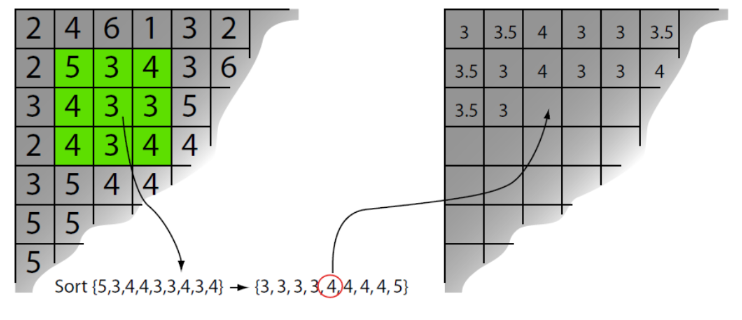

## Filtro de Laplace
Siendo el laplaciano la suma de las segundas derivadas parciales (concavidades, inflexiones, cambios acelerados), el filtro de Laplace se utiliza usualmente para encontrar los bordes de los objetos. Es un filtro pasaaltas que extrae las componentes frecuenciales más ruidosas de una imagen o de mayor variación.

$$
∇f(x_1,...,x_n) = ∑_{k=1}^{n} \frac{\partial^2 f }{\partial x^2_k}
$$
## Filtro Hessiano Híbrido
El hessiano es la matriz de las segundas derivadas parciales de una función. 

Este filtro puede utilizarse para detectar bordes continuos, por ejemplo, vasos, arrugas, ríos. Puede utilizarse para calcular la fracción de la imagen completa que contiene tales objetos. Está definido sólo para imágenes 2D y 3D.

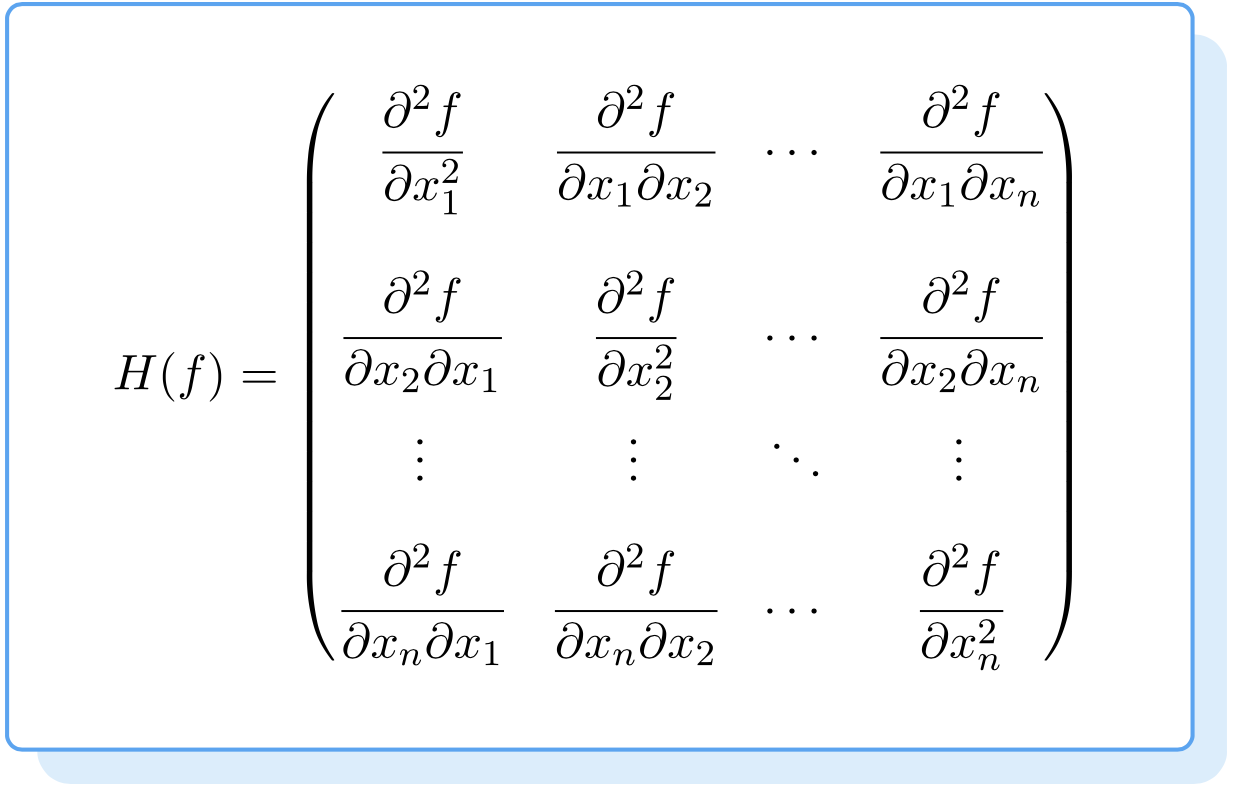

# Imágenes a tratar

## Importe de librerías

In [62]:
import cv2
import numpy as np
import skimage as sk
import skimage.util as sku
import skimage.filters as skf
from skimage.io import imread
from matplotlib import pyplot as plt
from google.colab import files, drive
from ipywidgets import interact, interact_manual
from IPython.display import display
from ipywidgets.widgets.interaction import interactive

#%matplotlib inline
#drive.mount('/gdrive')
#%cd '/gdrive/MyDrive/TS3 provisional/Laboratorio 3/'
#%ls

#files.upload()

## Importe y cargado de imágenes

In [ ]:
!wget 'https://github.com/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/raw/main/Images/Agronomia.jpg' -O 'Agronomia.jpg'
!wget 'https://github.com/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/raw/main/Images/Epigenetica.jpg' -O 'Epigenetica.jpg'
!wget 'https://github.com/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/raw/main/Images/Geologia.jpg' -O 'Geologia.jpg'
!wget 'https://github.com/Camilo-Hernandez/Analisis-y-tratamiento-de-imagenes/raw/main/Images/Laser.jpg' -O 'Laser.jpg'

In [8]:
def CargarImagen(img):
  img_rgb = img[:, :, ::-1]
  plt.imshow(img_rgb)
  plt.show()
  return img_rgb

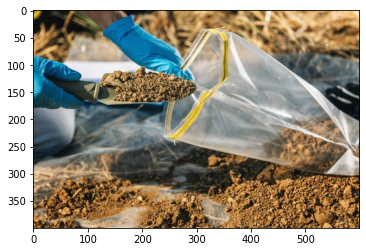

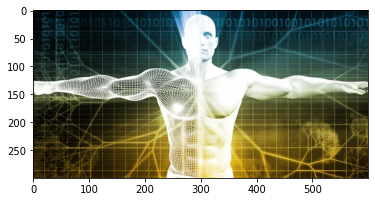

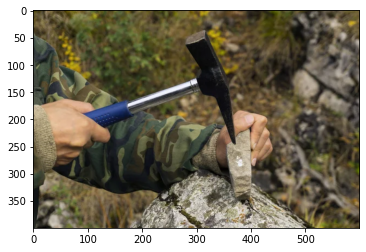

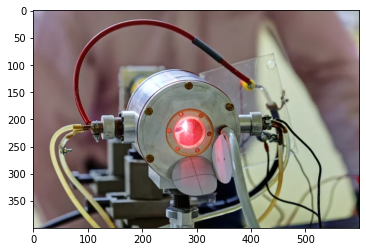

In [9]:
img1 = CargarImagen(cv2.imread('Agronomia.jpg'))
img2 = CargarImagen(cv2.imread('Epigenetica.jpg'))
img3 = CargarImagen(cv2.imread('Geologia.jpg'))
img4 = CargarImagen(cv2.imread('Laser.jpg'))

imagenes = (img1, img2, img3, img4)

# Insertando ruido en las imágenes

In [86]:
Ruido = ("gaussian", "poisson", "s&p", "speckle")
img_RG, img_RP, img_RSP, img_RS = [], [], [], []
rango_gaussiano = (0.025, 0.05, 0.075, 0.1)
rango_snp = (0.05, 0.1, 0.15, 0.23)
rango_speckle = (0.1, 0.2, 0.3, 0.4)
semilla = 2052
flag = 0

for r in Ruido:
  for img in imagenes:
    lista_aux=[]
    if flag == 0:
      for var in rango_gaussiano:
        img_r = sku.random_noise(img, mode = r, seed = semilla, var = var)
        lista_aux.append(img_r)
      else: img_RG.append(tuple(lista_aux))
    elif flag == 1:
      img_r = sku.random_noise(img, mode = r, seed = semilla)
      img_RP.append(img_r)
    elif flag == 2:
      for amount in rango_snp:
        img_r = sku.random_noise(img, mode = r, seed = semilla, amount = amount)
        lista_aux.append(img_r)
      else: img_RSP.append(tuple(lista_aux))
    else:
      for var in rango_speckle:
        img_r = sku.random_noise(img, mode = r, seed = semilla, var = var)
        lista_aux.append(img_r)
      else: img_RS.append(tuple(lista_aux))
  flag += 1

img_R = (tuple(img_RG), tuple(img_RP), tuple(img_RSP), tuple(img_RS))

# Graficando las imagenes ruidosas filtradas

In [112]:
@interact(Imagen = (1, 4, 1),
          NivelRuido = (1, 4, 1),
          Ruido = [("Gaussiano", 0), ("Poisson", 1), ("Salt & Pepper", 2), ("Speckle", 3)],
          NivelFiltro = (1,4,1),
          Filtro = [("Gaussiano", 0), ("de Mediana", 1), ("de Laplace", 2), ("Hessian", 3)]
          )

def ImagenRuidosaFiltrada(Imagen = 1, Ruido = 0, NivelRuido = 1, Filtro = 0, NivelFiltro=1):
  global imagenes, img_R, sigmas_gaussiano
  print('Nivel de ruido no aplicable en Poisson')
  print('Nivel de filtro sólo aplicable en Gaussiano')
  # Graficando las imágenes ruidosas
  r = ("Gaussiano", "Poisson", "Salt & Pepper", "Speckle")
  filtro = ("Gaussiano", "de Mediana", "de Laplace", "Hessian")
  sigmas_gaussiano = (0.3,0.6,0.9,1.12)
  ksizes=(3,15,30,50)
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 30))
  ax1.imshow(imagenes[Imagen-1])
  ax1.set_title(f'Imagen {Imagen} - Sin ruido')
  if Ruido != 1:
    img_r = img_R[Ruido][Imagen-1][NivelRuido-1]
    ax2.imshow(img_r)
    if Ruido == 0:
      tipo_nivel_ruido = 'Varianza'
      rango = rango_gaussiano
    elif Ruido == 2:
      tipo_nivel_ruido = 'Cantidad'
      rango = rango_snp
    else:
      tipo_nivel_ruido = 'Varianza'
      rango = rango_speckle
    ax2.set_title(f'Imagen {Imagen} - Ruido {r[Ruido]} nivel {NivelRuido} - {tipo_nivel_ruido} = {rango[NivelRuido-1]}')
  else:
    img_r = img_R[Ruido][Imagen-1]
    ax2.imshow(img_r)
    ax2.set_title(f'Imagen {Imagen} - Ruido de Poisson')
  
  # Generando las imágenes ruidosas filtradas
  if Filtro == 0:
    img_rf = skf.gaussian(img_r, sigma=sigmas_gaussiano[NivelFiltro-1], multichannel=True)
  elif Filtro == 1:
    img_rf = skf.median(img_r)
  elif Filtro == 2:
    img_rf = skf.laplace(img_r, ksize=ksizes[NivelFiltro-1])
  elif Filtro == 3:
    img_rf = skf.hessian(img_r[:,:,2])
  ax3.imshow(img_rf)
  ax3.set_title(f'Imagen {Imagen} ruidosa filtrada con Filtro {filtro[Filtro]}')

interactive(children=(IntSlider(value=1, description='Imagen', max=4, min=1), Dropdown(description='Ruido', op…

# Observaciones
- El ruido de Poisson no puede variar de ninguna forma, sólo tiene 1 nivel de variación.
- El filtro Gaussiano es el único al que se le pueden variar los parámetros.
- Las frecuencias altas están asociadas a más ruido.

# Conclusiones
- El ruido que más se nota a la vista es el Salt & Pepper, seguido del gaussiano y por último los que menos se notan son Poisson y Speckle.
- Comparando el ruido gaussiano con el speckle, se nota que la varianza utilizada para el speckle debe ser mucho más alta para notar el mismo efecto del ruido usado en el gaussiano, y además, la diferencia entre imágenes ruidosas con Speckle de varianzas 0.2 y 0.3 casi no se nota. Se asume este efecto visual a la naturaleza multiplicativa del Speckle respecto al gaussiano.
- El filtro laplaciano es pasa altas. Por ello las imágenes filtradas con S&P son mucho más ruidosas que la imagen ruidosa original.
- El filtro de medianas cumple su función como la teoría lo explica: funciona excelente para el ruido S&P. En las 4 imágenes se recupera bastante bien.

# Cibergrafía
1. Ruido gaussiano. (2022,25 de julio). Consultado desde Kripkit en https://kripkit.com/ruido-gaussiano/
2. Ruido de disparo. (2022, 25 de julio). Wikipedia, La enciclopedia libre. Fecha de consulta: 18:44, julio 25, 2022 desde https://es.wikipedia.org/w/index.php?title=Ruido_de_disparo&oldid=144962950. 
3. Ruido sal y pimienta. (2020, 25 de noviembre). Wikipedia, La enciclopedia libre. Fecha de consulta: 18:42, julio 25, 2022 desde https://es.wikipedia.org/w/index.php?title=Ruido_sal_y_pimienta&oldid=131216172.
4. https://es.scribd.com/doc/18948568/Ruido-de-Speckle 

